In [94]:
import pymysql
from sqlalchemy.types import String, Float, Integer
from sqlalchemy import DateTime
from sqlalchemy import create_engine
from sqlalchemy import exc
import os
import re
import pandas as pd
import numpy as np
import datetime as dt#准备工作，配置环境。

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

from matplotlib.backends.backend_pdf import PdfPages

In [95]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [96]:
# 导入数据
conn = pymysql.connect(	
    host = '47.116.3.109',	
    user = 'dngj',	
    passwd = '603603',	
    db = 'finance',	
    port=3306,	
    charset = 'utf8'	
    )	
rates = pd.read_sql('select * from finance.rates1',conn)
rates_us = pd.read_sql('select * from finance.rates_us',conn)
cash_cost = pd.read_sql('select * from finance.cash_cost',conn)

In [98]:
rates

,国债1年,国债3年,国债5年,国债7年,国债10年,地方1年,地方3年,地方5年,地方7年,地方10年,...,国债3月,国债6月,国债20年,国开3月,国开6月,国开20年,国开30年,cd_3m_aaa+,国债2年,date
0,2.5850,2.7271,2.8674,3.0057,3.2096,NaN,NaN,NaN,NaN,NaN,...,2.5312,2.5492,3.8586,NaN,2.4262,4.2020,4.0462,NaN,2.6563,2002-01-04
1,2.6009,2.7380,2.8728,3.0055,3.2003,NaN,NaN,NaN,NaN,NaN,...,2.5489,2.5663,3.8140,NaN,2.4827,4.2375,4.0414,NaN,2.6697,2002-01-07
2,1.9156,2.3842,2.7890,3.1302,3.5225,NaN,NaN,NaN,NaN,NaN,...,1.7235,1.7885,3.7951,NaN,2.3470,4.3868,4.1288,NaN,2.1578,2002-01-08
3,1.9040,2.4036,2.8317,3.1884,3.5896,NaN,NaN,NaN,NaN,NaN,...,1.6983,1.7680,3.7660,NaN,2.3652,4.3702,4.0866,NaN,2.1627,2002-01-09
4,1.8987,2.3954,2.8216,3.1772,3.5784,NaN,NaN,NaN,NaN,NaN,...,1.6942,1.7635,3.7693,NaN,2.3688,4.3747,4.0863,NaN,2.1559,2002-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,2.5252,2.8089,2.9598,3.0763,3.0877,2.5446,3.0581,3.2363,3.3680,3.4354,...,1.9658,2.2010,3.5285,1.9967,2.3052,3.7184,3.9475,2.4200,2.7200,2021-06-22
4863,2.5012,2.7860,2.9514,3.0671,3.0853,2.5432,3.0454,3.2232,3.3672,3.4303,...,1.9509,2.1912,3.5185,1.9700,2.2672,3.7127,3.9175,2.4302,2.6949,2021-06-23
4864,2.4690,2.7675,2.9489,3.0714,3.0828,2.5229,3.0230,3.2156,3.3595,3.4157,...,1.9661,2.1948,3.5172,1.9825,2.2922,3.7123,3.8875,2.4221,2.6776,2021-06-24
4865,2.4437,2.7614,2.9506,3.0783,3.0827,2.4950,3.0147,3.2043,3.3553,3.4058,...,1.9151,2.1855,3.5122,1.9503,2.2549,3.7147,3.8775,2.4191,2.6655,2021-06-25


In [99]:
rates_us

,美债1年,美债2年,美债10年,美债10-2,美元兑人民币,libor_3m,date
0,0.29,0.74,3.26,2.52,6.8275,0.53838,2010-06-21
1,0.29,0.71,3.18,2.47,6.7980,0.53825,2010-06-22
2,0.30,0.66,3.13,2.47,6.8102,0.53825,2010-06-23
3,0.29,0.67,3.14,2.47,6.8100,0.53719,2010-06-24
4,0.29,0.65,3.12,2.47,6.7896,0.53469,2010-06-25
...,...,...,...,...,...,...,...
2854,0.05,0.16,1.51,1.35,NaN,0.11800,2021-06-14
2855,0.08,0.16,1.51,1.35,6.4070,0.12475,2021-06-15
2856,0.08,0.21,1.57,1.36,6.4078,0.12450,2021-06-16
2857,0.08,0.23,1.52,1.29,6.4298,0.13450,2021-06-17


In [100]:
cash_cost

,DR001,DR007,GC007,shibor_3m,R007,date
0,NaN,NaN,NaN,NaN,2.3370,2001-06-26
1,NaN,NaN,NaN,NaN,2.3330,2001-06-27
2,NaN,NaN,NaN,NaN,2.3330,2001-06-28
3,NaN,NaN,NaN,NaN,2.3270,2001-06-29
4,NaN,NaN,NaN,NaN,2.3270,2001-06-30
...,...,...,...,...,...,...
4999,2.2524,2.2808,2.488,2.449,2.3371,2021-06-21
5000,2.3118,2.3580,2.607,2.457,2.4222,2021-06-22
5001,2.1816,2.2696,3.097,2.457,2.3719,2021-06-23
5002,1.8185,2.2559,3.346,2.455,2.7907,2021-06-24


In [101]:
rates1 = rates.loc[rates['date'] >= '2010-06-21']
rates1.index = rates1['date']
rates_us1 = rates_us.loc[rates_us['date'] >= '2007-01-04']
rates_us1.index = rates_us1['date']
#计算利差
margin1 = (rates1['国债10年']-rates_us1['美债10年']) * 100
margin2 = (rates1['国债2年']-rates_us1['美债2年']) * 100
margin3 = (rates1['国债1年']-rates_us1['美债1年']) * 100

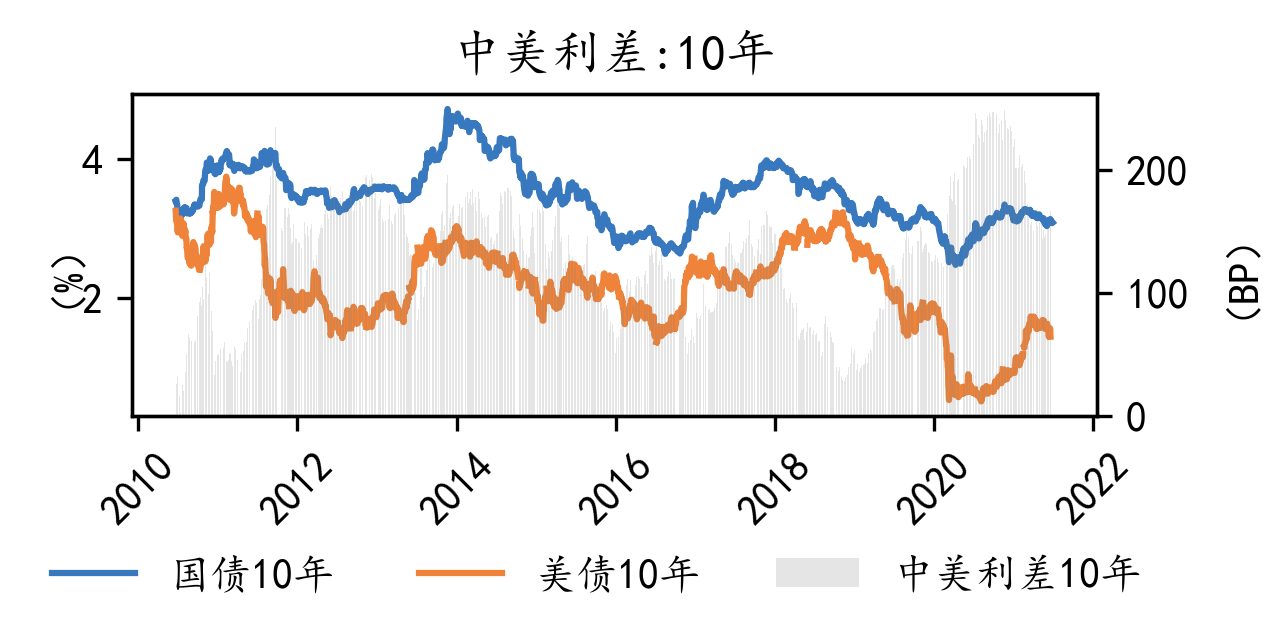

In [109]:
#中美利差:10年
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates1['date'],rates1['国债10年'],'#3778bf',label="国债10年")
plt.plot(rates_us1['date'],rates_us1['美债10年'],'#f0833a',label='美债10年')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.1,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（%）',fontsize=10)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.twinx()
plt.bar(margin1.index,margin1, width=1, color='gray',alpha = 0.2,label='中美利差10年')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.65,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（BP）',fontsize=10)
plt.title('中美利差:10年', fontsize=12)
plt.savefig('中美利差10年.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

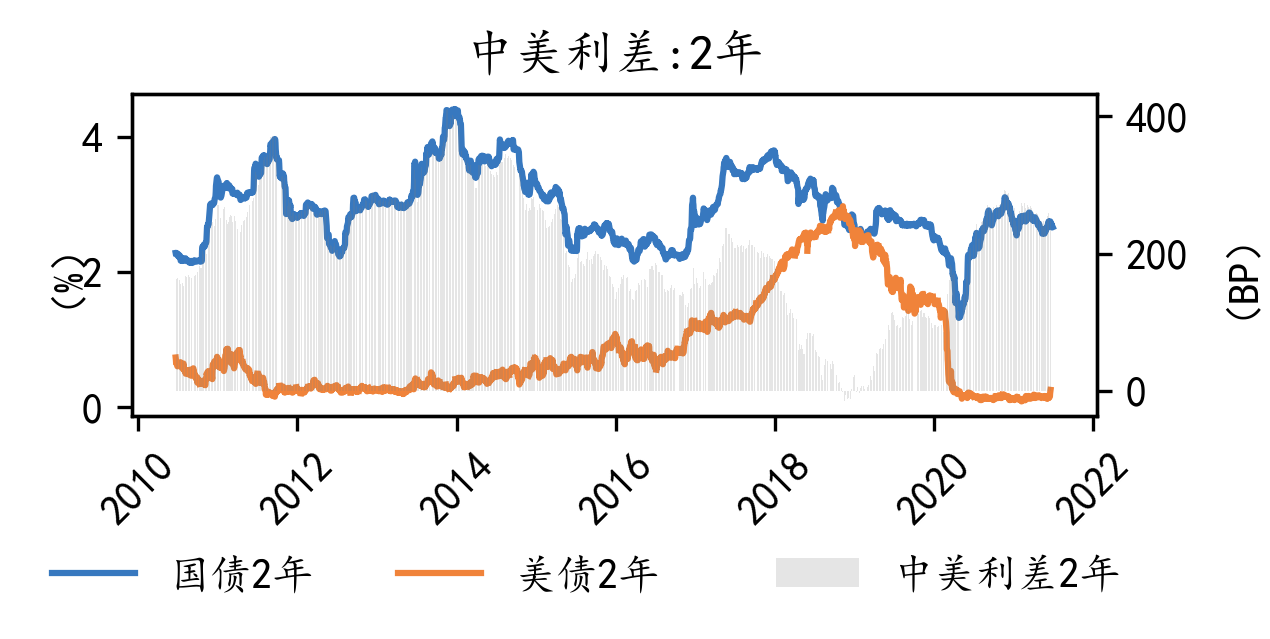

In [110]:
#中美利差:2年
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates1['date'],rates1['国债2年'],'#3778bf',label="国债2年")
plt.plot(rates_us1['date'],rates_us1['美债2年'],'#f0833a',label='美债2年')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.1,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（%）',fontsize=10)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.twinx()
plt.bar(margin2.index,margin2, width=1, color='gray',alpha = 0.2,label='中美利差2年')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.65,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.ylabel('（BP）',fontsize=10)
plt.title('中美利差:2年', fontsize=12)
plt.savefig('中美利差2年.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

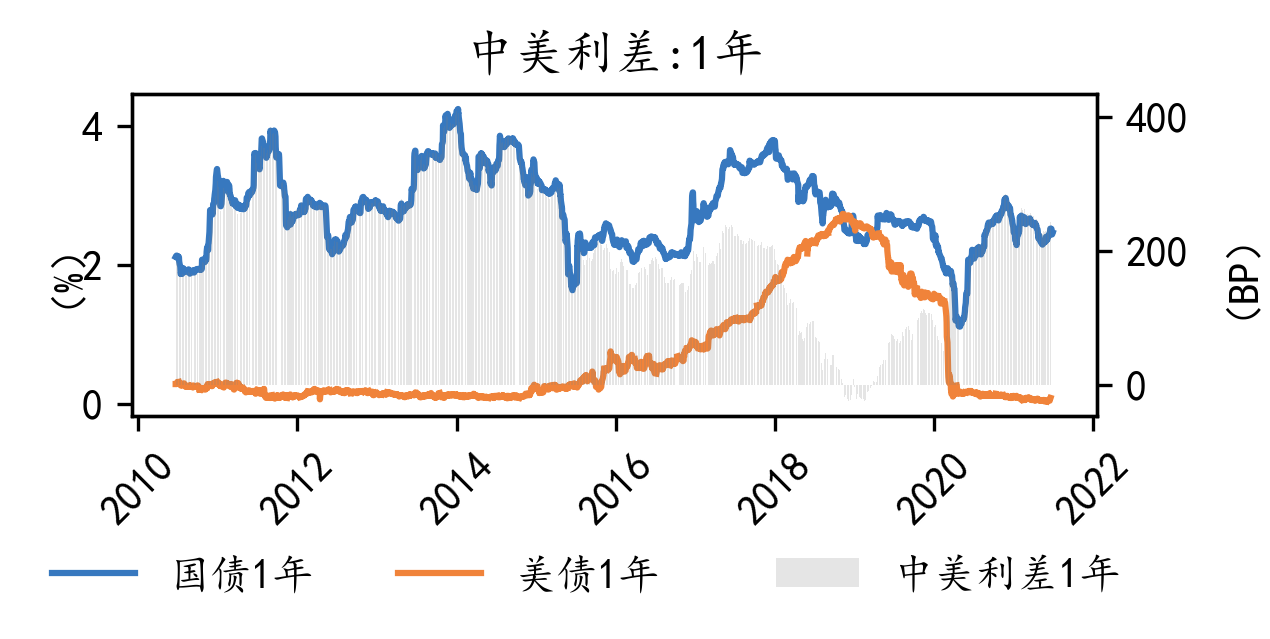

In [111]:
#中美利差:1年
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates1['date'],rates1['国债1年'],'#3778bf',label="国债1年")
plt.plot(rates_us1['date'],rates_us1['美债1年'],'#f0833a',label='美债1年')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.1,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)

plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.ylabel('（%）',fontsize=10)
plt.twinx()
plt.bar(margin3.index,margin3, width=1, color='gray',alpha = 0.2,label='中美利差1年')
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.65,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.title('中美利差:1年', fontsize=12)
plt.savefig('中美利差1年.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [112]:
rates2 = rates.loc[rates['date'] >= '2011-01-04']
rates2.index = rates2['date']
rates_us2 = rates_us.loc[rates_us['date'] >= '2011-01-04']
rates_us2.index = rates_us2['date']

In [113]:
#计算利差
margin4 = (rates2['国债10年']-rates_us2['美债10年']) * 100

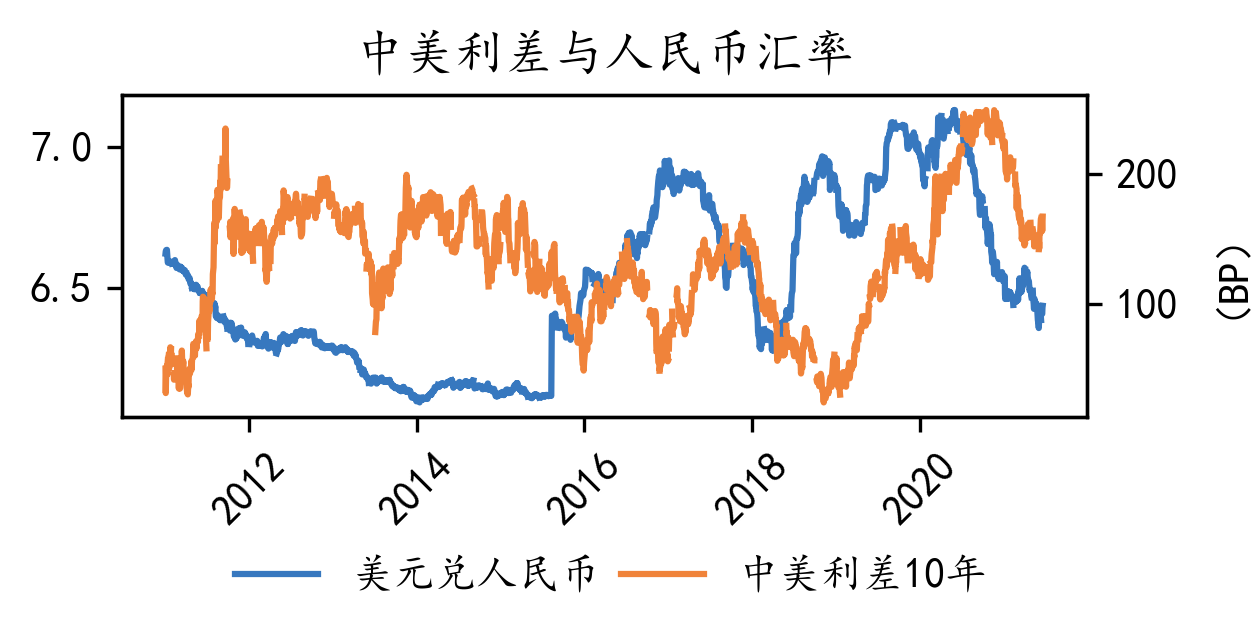

In [114]:
#中美利差与人民币汇率
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates_us2['date'],rates_us2['美元兑人民币'],'#3778bf',label="美元兑人民币")
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.1,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)

plt.twinx()
plt.plot(margin4.index,margin4,'#f0833a',label="中美利差10年")
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.5,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.title('中美利差与人民币汇率', fontsize=12)
plt.savefig('中美利差与人民币汇率.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [115]:
cash_cost1 = cash_cost.loc[cash_cost['date'] >= '2010-06-21']
cash_cost1.index = cash_cost1['date']

In [116]:
#计算利差
margin5 = (cash_cost1['shibor_3m']-rates_us1['libor_3m']) * 100

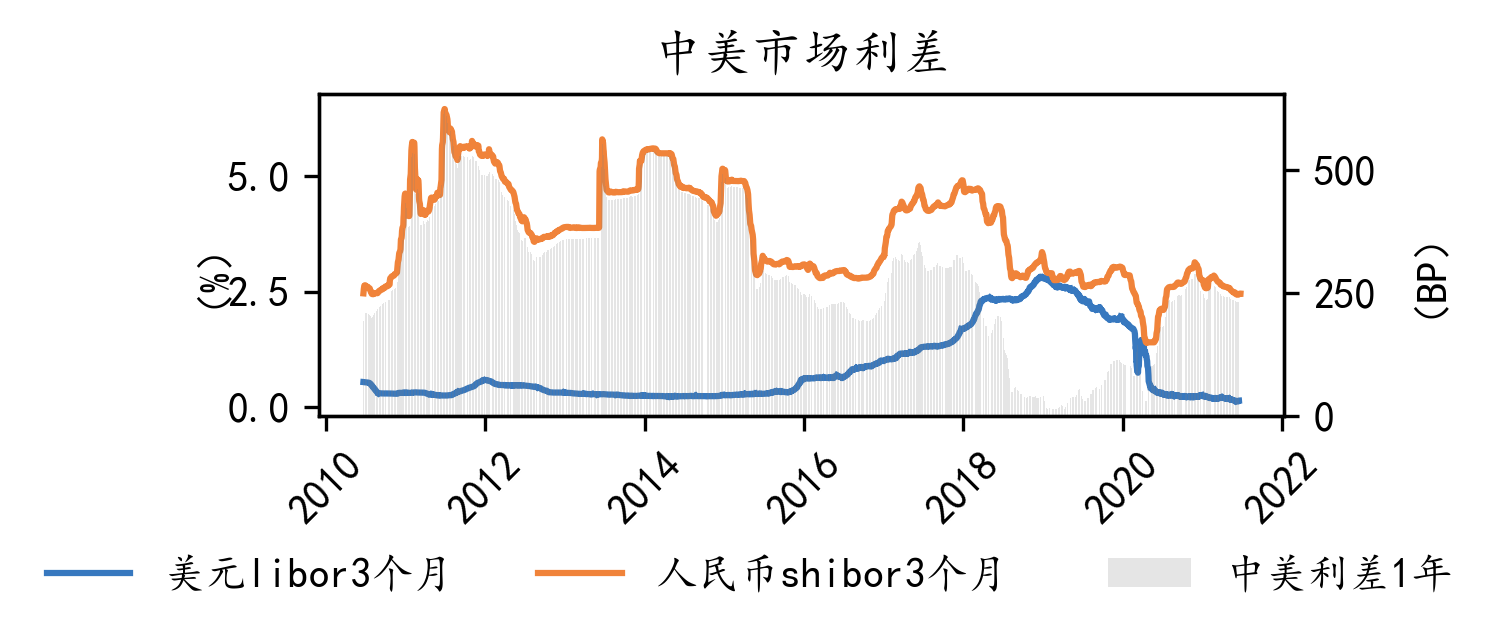

In [117]:
#中美市场利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates_us1['date'],rates_us1['libor_3m'],'#3778bf',label="美元libor3个月")
plt.plot(cash_cost1['date'],cash_cost1['shibor_3m'],'#f0833a',label='人民币shibor3个月')
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.3,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)

plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.ylabel('（%）',fontsize=10)
plt.twinx()
plt.bar(margin5.index,margin5, width=1, color='gray',alpha = 0.2,label='中美利差1年')
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.8,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.title('中美市场利差', fontsize=12)
plt.savefig('中美市场利差.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [118]:
#计算利差
margin6 = (rates_us1['美债10年']-rates_us1['美债2年']) * 100

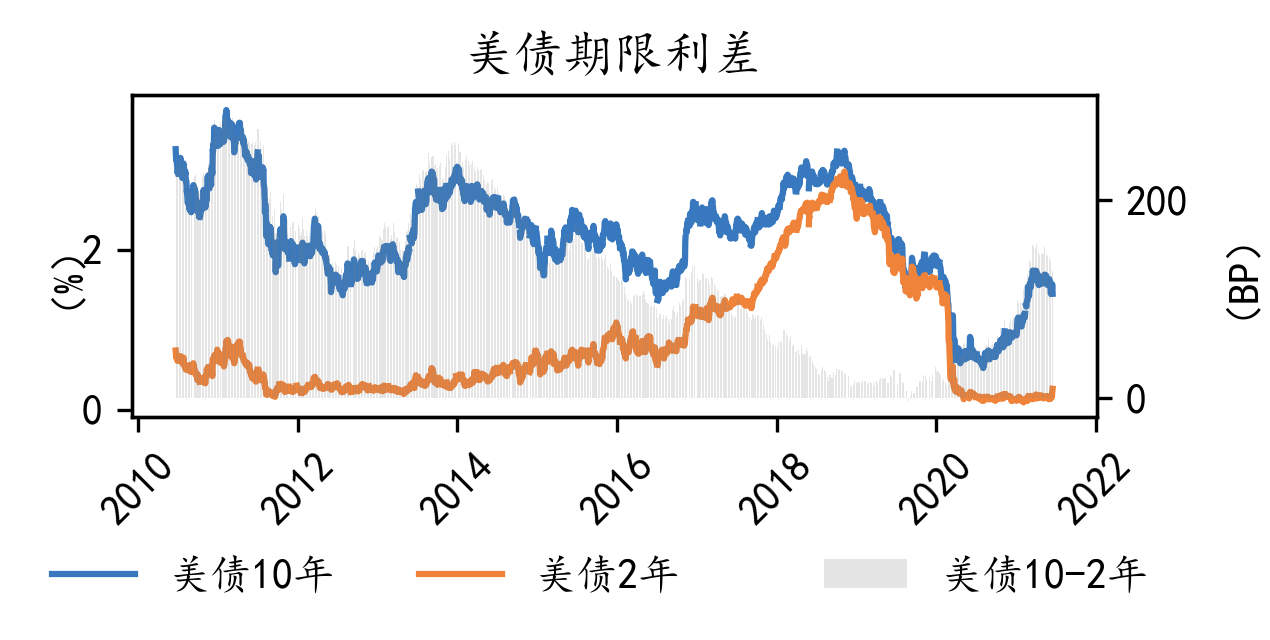

In [120]:
#美债期限利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates_us1['date'],rates_us1['美债10年'],'#3778bf',label="美债10年")
plt.plot(rates_us1['date'],rates_us1['美债2年'],'#f0833a',label="美债2年")
plt.legend(ncol=3,loc=3, bbox_to_anchor=(-0.1,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)

plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.ylabel('（%）',fontsize=10)
plt.twinx()
plt.bar(margin6.index,margin6, width=1, color='gray',alpha = 0.2,label='美债10-2年')
plt.ylabel('（BP）',fontsize=10)
plt.legend(ncol=3,loc=3, bbox_to_anchor=(0.7,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.title('美债期限利差', fontsize=12)
plt.savefig('美债期限利差.jpg', dpi=300, bbox_inches = 'tight')
plt.show()